In [96]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("ggplot")
sns.set(style='darkgrid', font_scale=1.1)

In [97]:
try:
 df = pd.read_csv("weight.csv")
 print("Berhasil membaca data")
except Exception as e:
 print(f"Gagal Membaca data as {e}")

Berhasil membaca data


In [98]:
df.shape

(108, 7)

In [99]:
df.isna().sum()

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

In [100]:
df.duplicated().sum()

np.int64(0)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


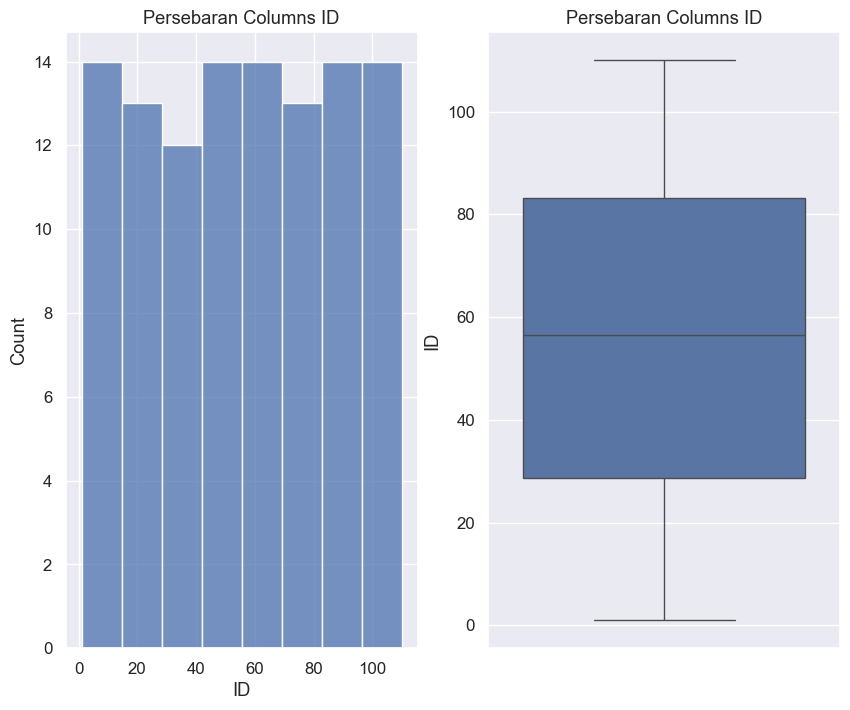

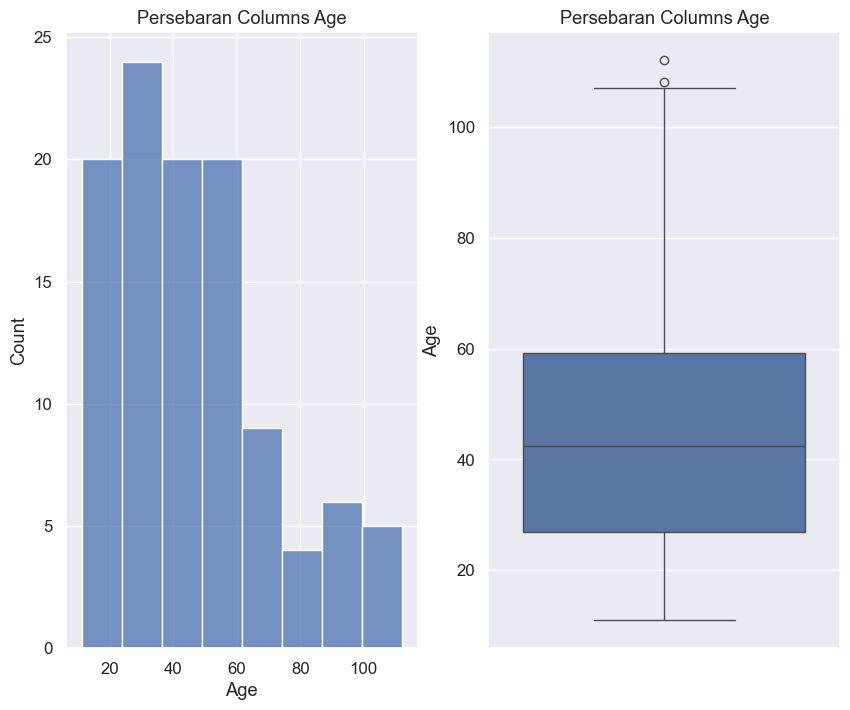

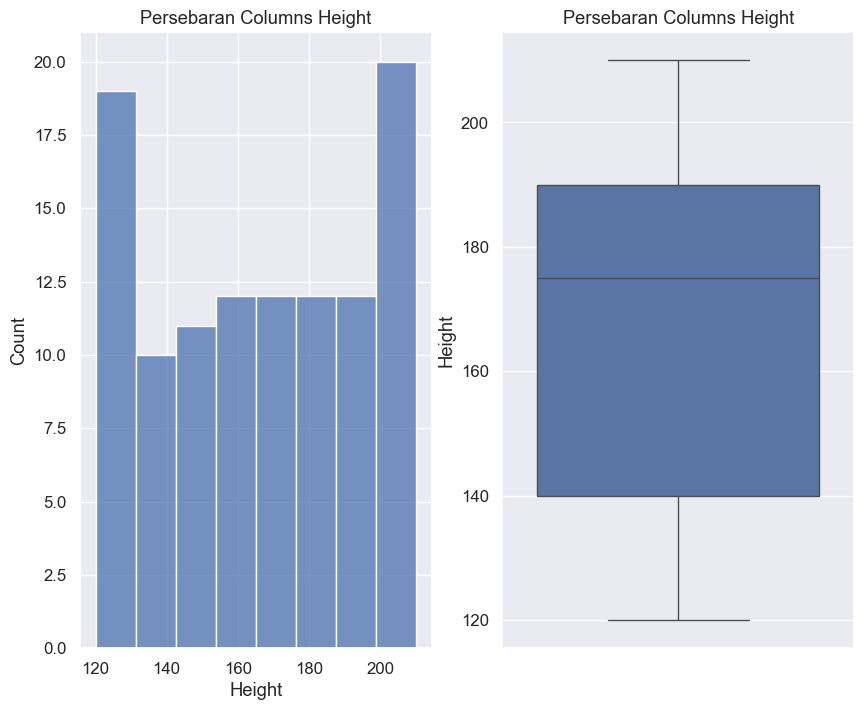

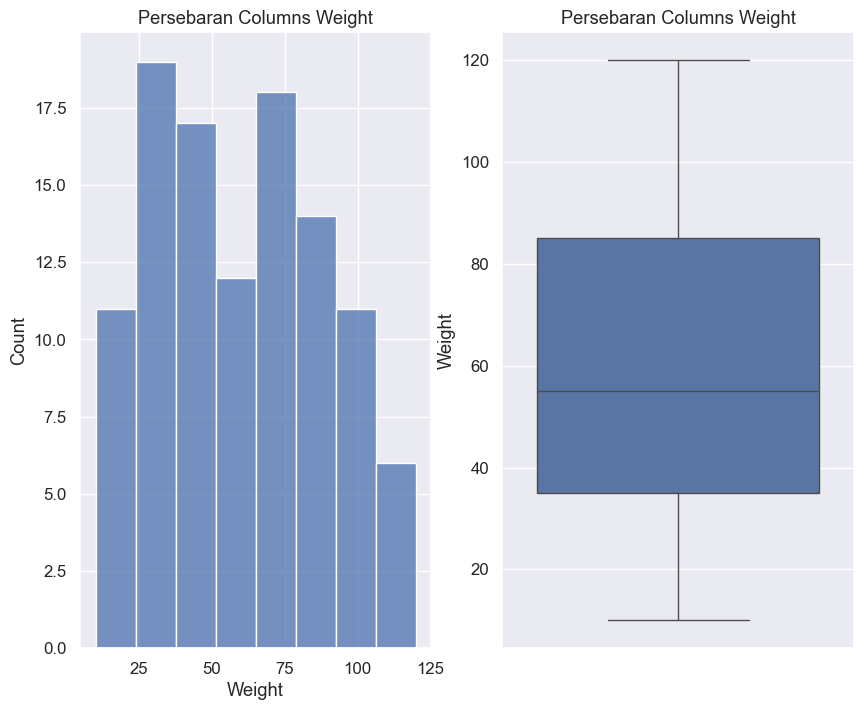

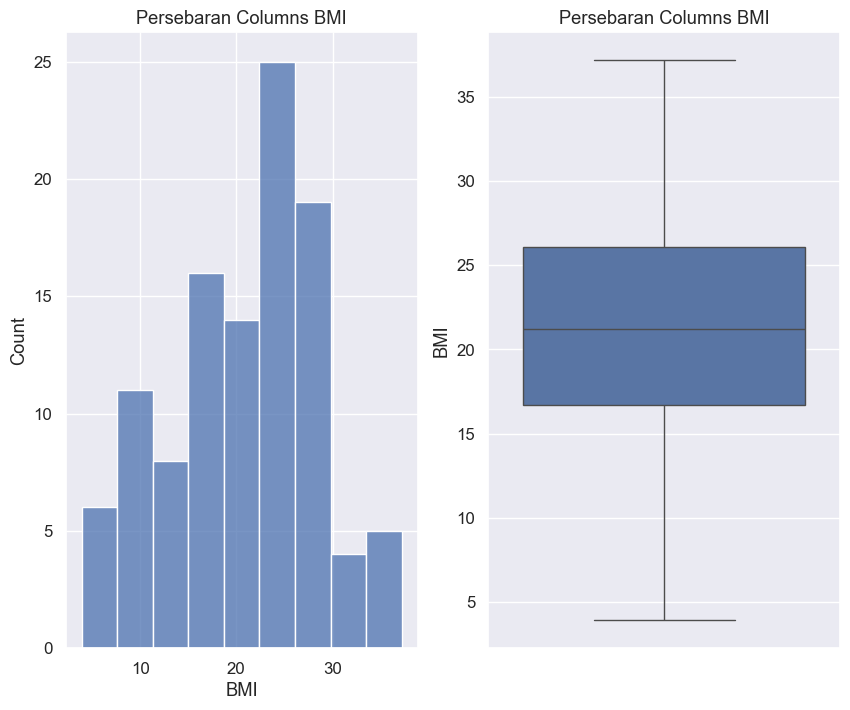

In [102]:
for col in df.select_dtypes(include='number'):
 fig, axes = plt.subplots(1,2, figsize=(10, 8))
 sns.histplot(df[col], ax = axes[0])
 axes[0].set_title(f"Persebaran Columns {col}")

 sns.boxplot(df[col], ax = axes[1])
 axes[1].set_title(f"Persebaran Columns {col}")

In [103]:
# obj = df.select_dtypes('object')

# for col in obj:
#     df[col] = df[col].astype('category').cat.codes
    

In [104]:
gender_mapping = {'Male' : 1, 'Female' : 2}
df['Gender'] = df['Gender'].map(gender_mapping)

In [105]:
label_mapping = {'Underweight' : 0, 'Normal Weight' : 1, 'Overweight' : 2, 'Obese' : 3}
df['Label'] = df['Label'].map(label_mapping)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    int64  
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 6.0 KB


In [107]:
features = df.drop(columns=['ID', 'Label'])
target = df['Label']

# features = (features - features.min()) / (features.max() - features.min())
features = (features - features.mean(axis=0)) / features.std(axis=0)

In [ ]:
# major_target = df[df['Label'] == 1]
# minor_target = df[df['Label'] == 0]

# length = len(major_target)

# minor_target_oversampled = minor_target.sample(n=length, replace=True, random_state=42)
# target = pd.concat([major_target, minor_target_oversampled])

In [ ]:
target.value_counts()

ID   Age  Gender  Height  Weight  BMI   Label
86   13   1       175     25      10.0  0        3
29   103  2       130     30      13.3  0        2
83   24   1       180     45      18.7  0        2
82   19   2       160     25      10.0  0        2
107  16   2       160     10      3.9   0        2
102  42   1       200     30      13.3  0        2
6    50   2       140     40      16.7  0        2
2    30   2       160     60      22.5  1        1
11   18   1       175     70      23.4  1        1
1    25   1       175     80      25.3  1        1
23   73   2       160     60      22.5  1        1
31   19   1       175     75      24.2  1        1
32   24   2       160     55      21.2  1        1
8    60   2       130     30      13.3  0        1
14   33   2       150     60      22.5  1        1
21   63   2       120     30      13.3  0        1
22   68   1       175     80      25.3  1        1
13   28   1       180     80      25.3  1        1
46   42   2       140     65      22

In [ ]:
X_data = features
y_data = target

In [ ]:
# fungsi untuk bagi data
def stratified_split_data(X, y, train_size=0.8, random_state=42):
    np.random.seed(random_state)
    
    X_train_list, X_test_list = [], []   
    y_train_list, y_test_list = [], [] 
    
    for class_value in np.unique(y):
        class_idx = np.where(y == class_value)[0]
        
        idx = np.random.permutation(class_idx)
        split_ratio = int(len(idx) * train_size)
        
        X_train_list.append(X.iloc[idx[:split_ratio]])
        X_test_list.append(X.iloc[idx[split_ratio:]])
        y_train_list.append(y.iloc[idx[:split_ratio]])
        y_test_list.append(y.iloc[idx[split_ratio:]])

    X_train = pd.concat(X_train_list).reset_index(drop=True)
    X_test = pd.concat(X_test_list).reset_index(drop=True)
    y_train = pd.concat(y_train_list).reset_index(drop=True)
    y_test = pd.concat(y_test_list).reset_index(drop=True)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = stratified_split_data(X_data, y_data)

In [ ]:
class KNN:
    def __init__(self, k, p):
        self.K = k
        self.P = p
        
    def train(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def jarak(self, x1, x2):
        if self.P == 1:
            return np.sum(np.abs(x1 - x2))
        else:
            return np.sqrt(np.sum((x1 - x2) ** 2))
        
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
    
    def _predict(self, x):
        jaraks = [self.jarak(x, x_train) for x_train in self.X_train]
        best_k = np.argsort(jaraks)[:self.K]
        label_k = [self.y_train[i] for i in best_k]
        hasil = max(set(label_k), key=label_k.count)
        return hasil

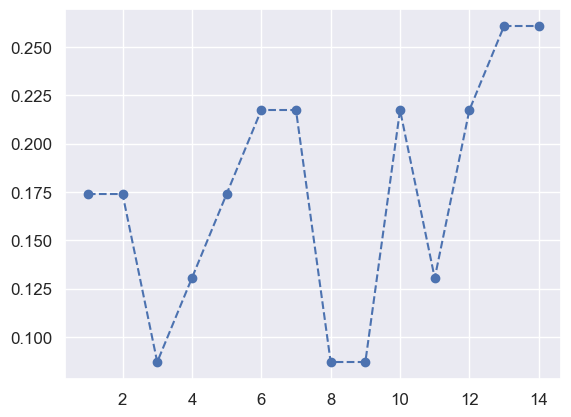

In [ ]:
errors = []
range_k = range(1, 15)

for k in range_k:
    model = KNN(k, 2)
    model.train(X_train.values, y_train.values)
    pred = model.predict(X_test.values)
    error = np.mean(pred != y_test.values)
    errors.append(error)
    
plt.plot(range_k, errors, marker='o', linestyle='--')
plt.show()

In [ ]:
best_acc = 0
best_params = {}

for k in [3, 5, 7, 9]:
    for p in [1, 2]:
        model = KNN(k, p)
        model.train(X_train.values, y_train.values)
        pred = model.predict(X_test.values)
        acc = np.mean(pred == y_test.values)
        
        if acc > best_acc:
            best_acc = acc
            best_params = {'k' : k, 'p' : p}
            
nama_jarak = "Manhattan" if best_params['p'] == 1 else "Euclidean"
print(f"Best K = {best_params['k']} | Best Jarak = {nama_jarak} | Best Akurasi = {best_acc}")

Best K = 3 | Best Jarak = Manhattan | Best Akurasi = 0.9565217391304348


In [ ]:
model = KNN(k=3, p=1)
model.train(X_train.values, y_train.values)

y_pred_test = model.predict(X_test.values)
y_pred_train = model.predict(X_train.values)

In [ ]:
accuracy_test = np.mean(y_pred_test == y_test.values)
accuracy_test

np.float64(0.9565217391304348)

In [ ]:
accuracy_train = np.mean(y_pred_train == y_train.values)
accuracy_train

np.float64(0.9764705882352941)

In [110]:
label = df['Label'].unique()

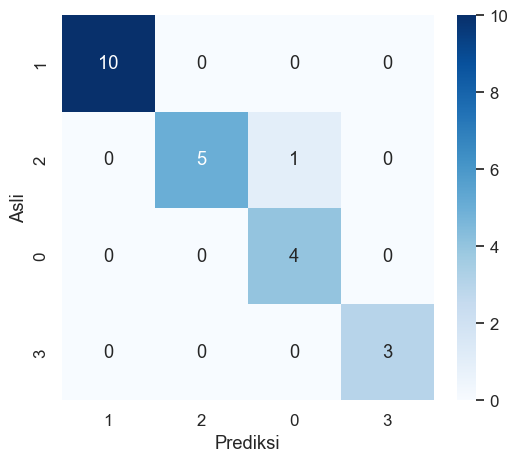

Kelas 1: TP=10, FP=0, FN=0, TN=13
Kelas 2: TP=5, FP=0, FN=1, TN=17
Kelas 0: TP=4, FP=1, FN=0, TN=18
Kelas 3: TP=3, FP=0, FN=0, TN=20


In [111]:
jumlah_kelas = len(np.unique(y_data))

cm = np.zeros((jumlah_kelas, jumlah_kelas), dtype=int)
for asli, tebak in zip(y_test, y_pred_test):
    cm[asli][tebak] += 1

TP = np.diag(cm)      
FP = np.sum(cm, axis=0) - TP 
FN = np.sum(cm, axis=1) - TP
TN = np.sum(cm) - (TP + FP + FN)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label, yticklabels=label)
plt.ylabel('Asli'); plt.xlabel('Prediksi')
plt.show()

for i, nama in enumerate(label):
    print(f"Kelas {nama}: TP={TP[i]}, FP={FP[i]}, FN={FN[i]}, TN={TN[i]}")

In [ ]:
# y_pred_array = np.array(y_pred_test)
# y_test_array = np.array(y_test.values)

# TP = np.sum((y_pred_array == 1) & (y_test_array == 1))
# FP = np.sum((y_pred_array == 1) & (y_test_array == 0))
# TN = np.sum((y_pred_array == 0) & (y_test_array == 0))
# FN = np.sum((y_pred_array == 0) & (y_test_array == 1))

# print(f"True Positives: {TP}")
# print(f"False Positives: {FP}")
# print(f"True Negatives: {TN}")
# print(f"False Negatives: {FN}")

True Positives: 5
False Positives: 0
True Negatives: 10
False Negatives: 0
